## MNIST Handwritten Digits Dataset
The data set contains images of hand-written digits: 10 classes where each class refers to a digit.

Preprocessing programs made available by NIST were used to extract normalized bitmaps of handwritten digits from a preprinted form. 30 contributed to this training set. 32x32 bitmaps are divided into nonoverlapping blocks of 4x4 and the number of on pixels are counted in each block. This generates an input matrix of 8x8 where each element is an integer in the range 0..16. This reduces dimensionality and gives invariance to small distortions.

For info on NIST preprocessing routines, see M. D. Garris, J. L. Blue, G. T. Candela, D. L. Dimmick, J. Geist, P. J. Grother, S. A. Janet, and C. L. Wilson, NIST Form-Based Handprint Recognition System, NISTIR 5469, 1994.

In [4]:
# Importing the Libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import os

from PIL import Image

In [5]:
path = "/content/drive/MyDrive/data/images"

##### Pre Analysis of Given Data
**What are the image file extensions?**

In [6]:
file_extensions = []
for root, dirs, files in os.walk(path):
    print(f"Reading images from {root}, Found {len(files)} files.")
    for file_name in files:
        file_extensions.append(os.path.splitext(file_name)[-1])
        file_path = os.path.join(root, file_name)

print()
print("Total Number of Files:", len(file_extensions))
print("File extensions:", set(file_extensions))

Reading images from /content/drive/MyDrive/data/images, Found 0 files.
Reading images from /content/drive/MyDrive/data/images/9, Found 180 files.
Reading images from /content/drive/MyDrive/data/images/8, Found 174 files.
Reading images from /content/drive/MyDrive/data/images/7, Found 179 files.
Reading images from /content/drive/MyDrive/data/images/6, Found 181 files.
Reading images from /content/drive/MyDrive/data/images/5, Found 182 files.
Reading images from /content/drive/MyDrive/data/images/4, Found 181 files.
Reading images from /content/drive/MyDrive/data/images/3, Found 183 files.
Reading images from /content/drive/MyDrive/data/images/2, Found 177 files.
Reading images from /content/drive/MyDrive/data/images/1, Found 182 files.
Reading images from /content/drive/MyDrive/data/images/0, Found 178 files.

Total Number of Files: 1797
File extensions: {'.png'}


**What are the image sizes, extensions and modes?**

In [7]:
def read_image_files(path):
    images_data = []
    for root, dirs, files in os.walk(path):
        for file_name in files:
            extension = os.path.splitext(file_name)[-1]
            if extension in file_extensions:
                file_path = os.path.join(root, file_name)
                img = Image.open(file_path)
                images_data.append({"file_name": file_name,
                                    "extension": extension,
                                    "size": img.size,
                                    "mode": img.mode,
                                    "dir": root})
    return images_data

def load_into_df(images_data):
    df = pd.DataFrame(images_data)
    return df

In [8]:
%%time

images_data = read_image_files(path)

df = load_into_df(images_data)

df.head()

CPU times: user 1.03 s, sys: 512 ms, total: 1.54 s
Wall time: 28.9 s


,file_name,extension,size,mode,dir
0,1Fg0ZNK0OO5AmJ91IBsY.png,.png,"(8, 8)",L,/content/drive/MyDrive/data/images/9
1,2351gaKB6F8aPPCcoQDR.png,.png,"(8, 8)",L,/content/drive/MyDrive/data/images/9
2,1yBkNCyNpVGIBfod8UlZ.png,.png,"(8, 8)",L,/content/drive/MyDrive/data/images/9
3,20L82jdLovEWssr3W6Wx.png,.png,"(8, 8)",L,/content/drive/MyDrive/data/images/9
4,1QLz7J60E22x0JGbHSM7.png,.png,"(8, 8)",L,/content/drive/MyDrive/data/images/9


In [9]:
df["extension"].value_counts()

,count
extension,
.png,1797


In [10]:
df["mode"].value_counts()

,count
mode,
L,1797


In [11]:
df["size"].value_counts()

,count
size,
"(8, 8)",1797


#### Observations
- There are 1797 images in total.
- All these images are having .png format.
- All these images are of same size i.e. (8, 8) and same mode i.e. Gray Scale.

In [12]:
# Loading the Data

def vectorize_image_files(path):
    image_vectors = []
    image_labels = []
    # Get the list of folder names (labels)
    labels = [dir_name for dir_name in os.listdir(path) if os.path.isdir(os.path.join(path, dir_name))]
    for label in labels:
        label_dir = os.path.join(path, label)
        # Ensure the directory exists
        if os.path.isdir(label_dir):
            # Iterate through each image in the directory
            for image_file in os.listdir(label_dir):
                image_file_path = os.path.join(label_dir, image_file)
                with Image.open(image_file_path) as img:
                    #### Vectorize ####
                    img_arr = np.array(img)
                    image_vector = img_arr.ravel()
                    ###################
                    image_vectors.append(image_vector)
                    image_labels.append(label)
    return image_vectors, image_labels


def load_vectors_into_df(image_vectors, image_labels):
    df = pd.DataFrame(image_vectors, columns=[f"pixel_{i}" for i in range(len(image_vectors[0]))])
    df['labels'] = image_labels
    return df

In [13]:
image_vectors, image_labels = vectorize_image_files(path)

image_df = load_vectors_into_df(image_vectors, image_labels)

image_df.head()

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_55,pixel_56,pixel_57,pixel_58,pixel_59,pixel_60,pixel_61,pixel_62,pixel_63,labels
0,0,0,0,47,191,255,239,15,0,0,...,0,0,0,0,47,223,15,0,0,9
1,0,0,143,207,239,159,15,0,0,15,...,0,0,0,143,255,191,15,0,0,9
2,0,0,127,255,159,31,0,0,0,0,...,79,0,0,47,223,255,255,175,15,9
3,0,0,31,207,127,95,0,0,0,0,...,0,0,0,47,191,255,255,15,0,9
4,0,0,47,175,239,127,0,0,0,47,...,0,0,0,47,255,239,127,15,0,9


#### Exploratory Data Analysis

In [14]:
image_df.shape

(1797, 65)

In [15]:
image_df["labels"].value_counts()

,count
labels,
3,183
5,182
1,182
6,181
4,181
9,180
7,179
0,178
2,177


<Axes: xlabel='labels', ylabel='count'>

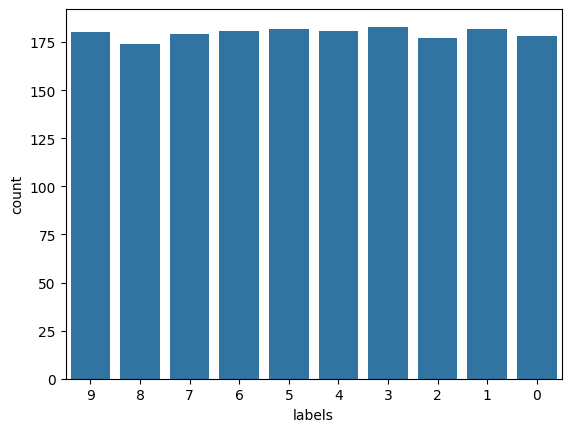

In [16]:
sns.countplot(data=image_df, x='labels')

Randomly Generated index: 1737
Label of image at 1737 index: 0

Data Type of Image Array: object
Image Array:
 [[0 0 63 191 159 15 0 0]
 [0 47 255 207 239 159 0 0]
 [0 79 255 31 15 223 47 0]
 [0 127 207 0 0 159 127 0]
 [0 127 191 0 0 127 127 0]
 [0 127 223 0 0 175 127 0]
 [0 47 255 223 207 255 31 0]
 [0 0 127 255 207 79 0 0]]


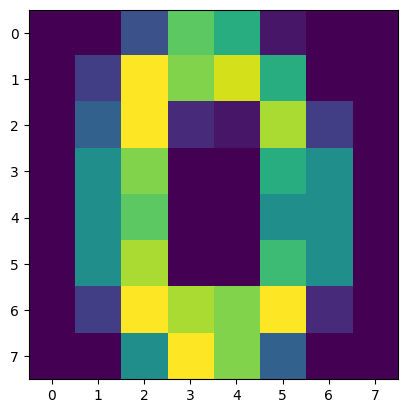

In [18]:
idx = np.random.randint(0, 1796)

print("Randomly Generated index:", idx)

print(f"Label of image at {idx} index:", image_df.iloc[idx, -1])
print()

img = np.reshape(image_df.iloc[idx, 0:-1], (8,8))

print("Data Type of Image Array:", img.dtype)
print("Image Array:\n", img)

img = img.astype("float")

plt.imshow(img)

[ 994  937   45 1696   88  666  854  659  549]


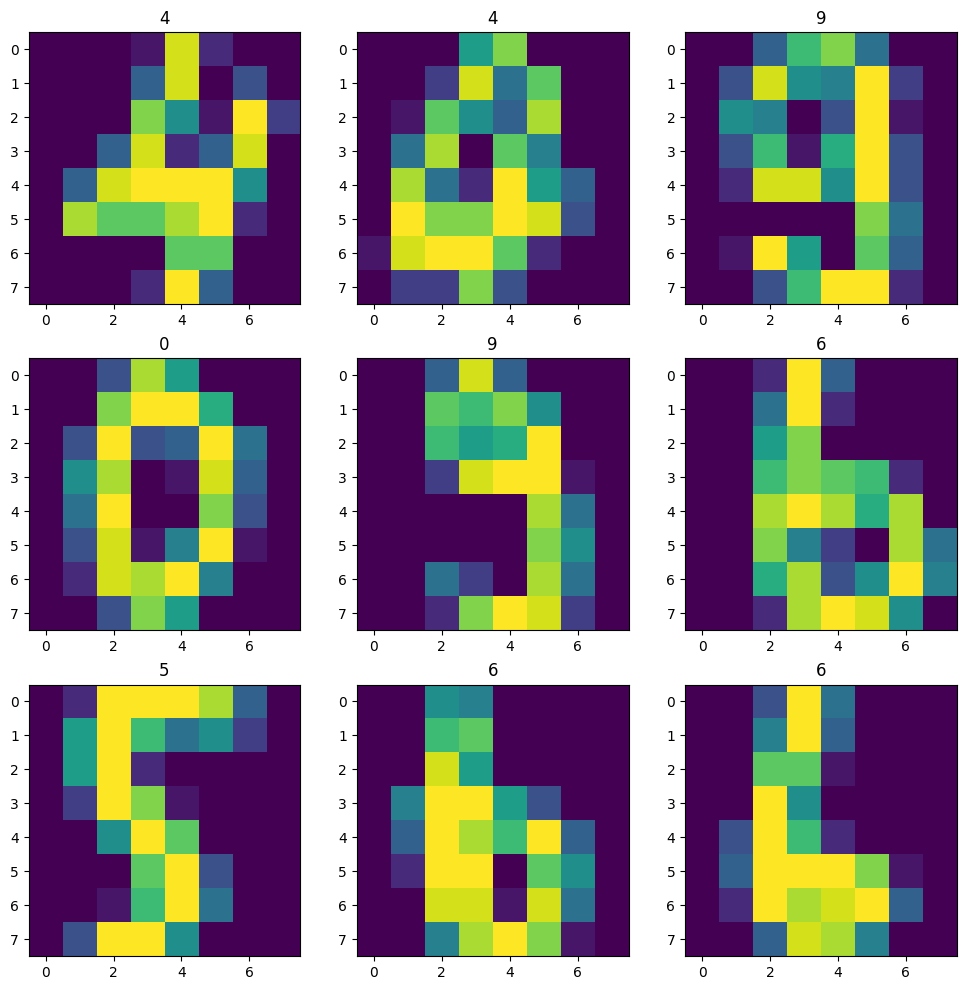

In [19]:
plt.figure(figsize=(12, 12))
idx = np.random.randint(0, image_df.shape[0], 9)
print(idx)

for i in range(len(idx)):
    plt.subplot(3, 3, i+1)
    label = image_df.iloc[idx[i], -1]
    plt.title(label)
    img_grid = np.reshape(image_df.iloc[idx[i], 0:-1], (8,8))
    img_grid = img_grid.astype("float")
    plt.imshow(img_grid)

In [20]:
## Segregate Inputs (X) and Output (y)

#Define the predictors (X) and target variable (y)

X = image_df.drop(columns=['labels'])

y = image_df['labels']

In [21]:
# Split into train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.25,
                                                    random_state = 0)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(1347, 64) (1347,)
(450, 64) (450,)


In [22]:
# Rescaling numerical features
from sklearn.preprocessing import MinMaxScaler

minmax_scaler = MinMaxScaler()

# column names are (annoyingly) lost after Scaling
# (i.e. the dataframe is converted to a numpy ndarray)
X_train_transformed = pd.DataFrame(minmax_scaler.fit_transform(X_train),
                                    columns = minmax_scaler.get_feature_names_out(),
                                    index = X_train.index)

X_train_transformed.head()

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_54,pixel_55,pixel_56,pixel_57,pixel_58,pixel_59,pixel_60,pixel_61,pixel_62,pixel_63
372,0.0,0.0,0.372549,0.874510,1.000000,0.811765,0.000000,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.623529,0.811765,0.000000,0.000000,0.000000,0.0
1443,0.0,0.0,0.000000,0.498039,0.749020,0.560784,0.121569,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.560784,0.749020,0.372549,0.000000,0.0
1792,0.0,0.0,0.184314,0.937255,0.560784,0.000000,0.000000,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.058824,0.811765,0.874510,0.309804,0.000000,0.0
211,0.0,0.0,0.435294,0.874510,0.686275,0.000000,0.000000,0.0,0.0,0.058824,...,0.247059,0.0,0.0,0.0,0.435294,0.937255,1.000000,1.000000,0.184314,0.0
632,0.0,0.0,0.058824,0.623529,0.000000,0.000000,0.000000,0.0,0.0,0.000000,...,0.937255,0.0,0.0,0.0,0.184314,0.623529,0.937255,0.560784,0.121569,0.0


In [23]:
X_test_transformed = pd.DataFrame(minmax_scaler.transform(X_test),
                                    columns = minmax_scaler.get_feature_names_out(),
                                    index = X_test.index)

X_test_transformed.head()

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_54,pixel_55,pixel_56,pixel_57,pixel_58,pixel_59,pixel_60,pixel_61,pixel_62,pixel_63
1081,0.0,0.0,0.498039,0.749020,0.749020,0.874510,0.184314,0.000000,0.0,0.000000,...,0.121569,0.0,0.0,0.104895,0.686275,0.874510,0.937255,0.184314,0.000000,0.0
1707,0.0,0.0,0.121569,0.686275,0.811765,0.309804,0.000000,0.000000,0.0,0.058824,...,0.435294,0.0,0.0,0.000000,0.184314,0.811765,1.000000,0.560784,0.000000,0.0
927,0.0,0.0,0.000000,0.309804,0.749020,0.000000,0.121569,0.072464,0.0,0.000000,...,0.000000,0.0,0.0,0.000000,0.000000,0.309804,0.686275,0.000000,0.000000,0.0
713,0.0,0.0,0.000000,0.811765,0.937255,0.247059,0.000000,0.000000,0.0,0.000000,...,0.811765,0.0,0.0,0.000000,0.058824,0.811765,1.000000,1.000000,0.623529,0.0
262,0.0,0.0,0.184314,0.749020,1.000000,0.560784,0.000000,0.000000,0.0,0.000000,...,0.000000,0.0,0.0,0.000000,0.121569,1.000000,1.000000,0.372549,0.000000,0.0


##### Training and Testing Phase (Decision Tree)

In [24]:
%%time

from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train_transformed, y_train)

y_test_pred = dt_classifier.predict(X_test_transformed)

print("Model's Accuracy:", metrics.accuracy_score(y_test, y_test_pred))
print()

Model's Accuracy: 0.8622222222222222

CPU times: user 271 ms, sys: 33.4 ms, total: 304 ms
Wall time: 453 ms


##### Training and Testing Phase (Random Forest)

In [25]:
%%time

from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train_transformed, y_train)

y_test_pred = rf_classifier.predict(X_test_transformed)

print("Model's Accuracy:", metrics.accuracy_score(y_test, y_test_pred))
print()

Model's Accuracy: 0.9711111111111111

CPU times: user 644 ms, sys: 21.4 ms, total: 665 ms
Wall time: 733 ms
